<br>
<center><font color='blue' size="4px"><b><u>Customer Segmentation using RFM and K-Means Clustering</u><b/></font></center>


<br>
<font color='red' size="3px"><b><u>Introduction</u><b/></font>

<b>Customer Segmentation:<b>

*  It's a methodology using which we can divide our customers into group of individuals who are similar in terms of either gender, spending behaviour, frequency of visit, age or other demographics.
*  Customer segmentation allows companies to precisely target the customers who has a specific needs and desires. This way companies can design the targeted campaigns to the right groups or audience.
*  It may also be the case that during the creation of these individual groups or clusters, company might identify new market segments on which the company can focus more as it might be more lucrative.
*  Using segmentation companies can identify groups that require extreme attention such that people in that group are on the verge of churning out.
*  There may be a group of customers or segments who has a highest potential value. It can help with creating targeted strategies that can capture the customers attention and create positive high-value experiences with the brand's



<br>
<font color='red' size="3px"><b><u>To Segment Customers calculate:</u><b/></font>

1. RFM Score for each customer
2. Create clusters using K-Means

*  Here to perform customer segmentation we will first utilize RFM modeling to calculate the RFM scores for each customer and then we will apply unsupervised machine learning technique called k-Means to group those customers into different groups based on RFM scores calculated.

<br>
<font color='red' size="3px"><b><u>RFM:</u><b/></font>

*  RFM stands for Recency, Frequency and Monetary
1. Recency:
   *  Recency means how recently a customer purchased an item or product
   *  The more the recent purchases the better the score would be.
2. Frequency:
   *  Frequency represents how often a customer purchases an item or product
   *  The more frequent they purchase the better score would be for frequency
3. Monetary:
   *  Monetary represents how much the customer spends.
   *  The more the amount the better monetary score would be

<br>
<font color='red' size="3px"><b><u>Segments:</u><b/></font>

*  According to business requirement a company might create three segments like high, medium, low.
1. High: Groups who buys often, spends more and visited the platform recently.
2. Medium: Groups which spends less than high group and is not that much frequent to visit the platform.
3. Low: Groups which is on the verge of churning out.

So let's go ahead and start calculating the RFM for each individual customer.

<br>
<font color='red' size="3px"><b><u>Dataset:</u><b/></font>

__[Click here to Download Dataset](https://drive.google.com/file/d/1rvmv9Xt9bMTM_TokQi36Wq3P4dt4-Yl_/view?usp=share_link)__


<font color='red'><b>Dataset Overview</b></font><br>

We have structured data with 541909 rows and 9 columns.

<b>Exploring the content of variables:</b>

This dataframe contains 8 variables that correspond to:

<b>InvoiceNo:</b> Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

<b>StockCode:</b> Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

<b>Description:</b> Product (item) name. Nominal.

<b>Quantity:</b> The quantities of each product (item) per transaction. Numeric.

<b>InvoiceDate:</b> Invoice Date and time. Numeric, the day and time when each transaction was generated.

<b>UnitPrice:</b> Unit price. Numeric, Product price per unit in sterling.

<b>CustomerID:</b> Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

<b>Country:</b> Country name. Nominal, the name of the country where each customer resides.






In [80]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import squarify
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [165]:
#Loading the dataset
data=pd.read_csv('ecommerce.csv',encoding='iso8859-1')# encoding:this was included to avoid any errors which might have occured due to sudden invalid characters it might have encountered

<br>
<font color='red' size="3px"><b><u>Exploratory Data Analysis:</u><b/></font>

Exploratory data analysis(EDA), learning about the data you’re working with

I give some basic informations on the content of the dataframe: 
the type of the various variables, the number of null values and their percentage with respect to the total number of entries:

In [82]:
df=data.copy()

In [83]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN


In [84]:
#Check the shape (number of columns and rows) in the dataset

df.shape 

(541909, 9)

In [85]:
#Display first 5 observations
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [86]:
#Display last 5 observations
df.tail() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


In [87]:
#column 8 is useless so delete it
df.drop(df.iloc[:, 8:], inplace=True, axis=1)


In [88]:
#Check for missing values in the dataset

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

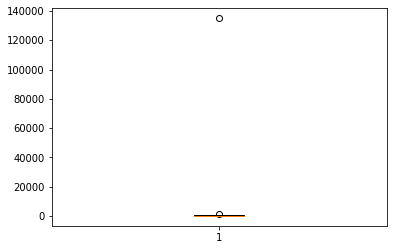

In [89]:
plt.boxplot(df.isnull().sum(),vert=True, patch_artist=True);

In [90]:
#Remove missing values from CustomerID column, can ignore missing values in description column
df = df[pd.notnull(df['CustomerID'])]


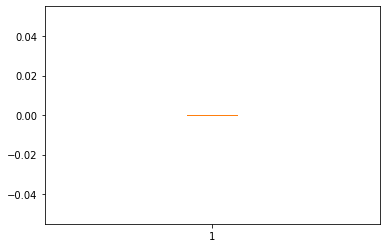

In [91]:
plt.boxplot(df.isnull().sum(),vert=True, patch_artist=True);

In [93]:
#Validate if there are any negative values in UnitPrice column
df.UnitPrice.min()

0.0

In [95]:
#check for duplicate entries and delete them
print('Duplicate entries: {}'.format(df.duplicated().sum()))

Duplicate entries: 5226


In [96]:
df.drop_duplicates(inplace = True)

In [97]:
#Convert the string date field to datetime

df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')


In [98]:
df['CustomerID']=df['CustomerID'].astype(int)

In [99]:
df.dtypes #Display variable names and data types

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [100]:
 #Display the complete summary of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401603 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401603 non-null  object        
 1   StockCode    401603 non-null  object        
 2   Description  401603 non-null  object        
 3   Quantity     401603 non-null  int64         
 4   InvoiceDate  401603 non-null  datetime64[ns]
 5   UnitPrice    401603 non-null  float64       
 6   CustomerID   401603 non-null  int32         
 7   Country      401603 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.0+ MB


In [101]:
#Descriptive Statistics
df.describe() 

,Quantity,UnitPrice,CustomerID
count,401603.000000,401603.000000,401603.000000
mean,12.183298,3.474067,15281.162093
std,250.283348,69.764122,1714.008032
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000



The existence of entries with the prefix C for the InvoiceNo variable: this indicates transactions that have been cancelled

First of all, I count the number of transactions corresponding to canceled orders:


In [102]:
df1=df.copy()

In [103]:
df1['order_canceled'] = df1['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = df1['order_canceled'].sum()
n2 = df1.shape[0]
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


Number of orders cancelled: 8872/401603 (2.21%) 


In [104]:
df['InvoiceNo'] = df['InvoiceNo'].str.extract('(\d+)', expand=False)


The StockCode variable indicate a particular transaction (i.e. D for Discount). 

In [105]:
s_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
s_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [106]:
for code in s_codes:
    print("{:<15} -> {:<30}".format(code, df[df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


In [107]:
#Add new column depicting total amount

df['TotalPrice'] = df['UnitPrice'] * (df['Quantity'])
df = df[df['TotalPrice'] > 0]


In [108]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
df.shape

(392691, 9)

In [109]:
#Seperating the data into categorical and numerical data.
numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int64','float64']]
numeric_data = df.iloc[:,numeric_feature]


In [110]:
numeric_data

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
...,...,...,...
541904,12,0.85,10.20
541905,6,2.10,12.60
541906,4,4.15,16.60
541907,4,4.15,16.60


<br>
<font color='red' size="3px"><b><u>Correlation:</u><b/></font>

*  Correlation help us to find out the interrelationship between all the features

In [111]:
numeric_data.corr()

,Quantity,UnitPrice,TotalPrice
Quantity,1.000000,-0.004578,0.914451
UnitPrice,-0.004578,1.000000,0.081619
TotalPrice,0.914451,0.081619,1.000000


1. Correlation with respect to Quantity and TotalPrice we can see that 91 % correlation. It basically indicate that if the quantity increasing TotalPrice also increasing(Positive correlation).
2. Correlation with respect to UnitPrice and TotalPrice we can see that 8.1% correlated(Positive correlation).
3. Quantity and UnitPrice are negatively correlated that means their tend to move in opposite directions.


*  Seaborn has a property called 'heatmap' it helps us to find out the correlation betweeen each and every feature

<AxesSubplot:>

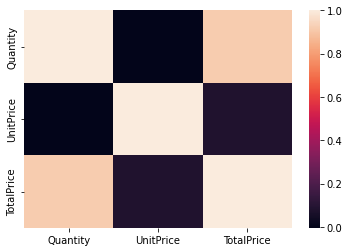

In [112]:
sns.heatmap(numeric_data.corr())

Countries from which orders were made:

In [113]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of countries in the dataframe: {}'.format(len(countries)))

Number of countries in the dataframe: 37


Result on a chloropleth map:


In [114]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

*  We can see that the dataset is largely dominated by orders made from the UK.



In [115]:
df2=df.copy()



<br>
<font color='red' size="3px"><b><u>RFM:</u><b/></font>

In [116]:
end_date = max(df2['InvoiceDate']) + dt.timedelta(days=1)

rfm = df2.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (end_date - x.max()).days),
    frequency=('InvoiceNo', 'count'),
    monetary=('TotalPrice', 'sum')
)

rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346,326,1,77183.60
12347,3,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [117]:
#Descriptive Statistics (Recency)
rfm.recency.describe()

count    4338.000000
mean       93.059474
std       100.012264
min         1.000000
25%        18.000000
50%        51.000000
75%       142.750000
max       374.000000
Name: recency, dtype: float64

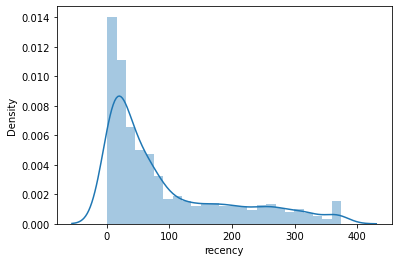

In [118]:
#Recency distribution plot
x = rfm['recency']

ax = sns.distplot(x)

In [119]:
#Descriptive Statistics (Frequency)
rfm.frequency.describe()

count    4338.000000
mean       90.523513
std       225.505975
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: frequency, dtype: float64

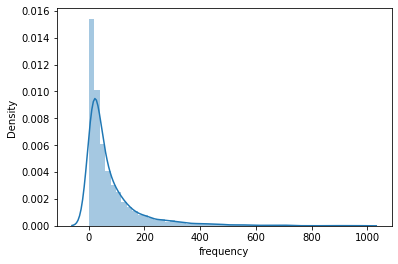

In [120]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm.query('frequency < 1000')['frequency']

ax = sns.distplot(x)


In [121]:
#Descriptive Statistics (Monetary)
rfm.monetary.describe()

count      4338.000000
mean       2048.687182
std        8985.229383
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: monetary, dtype: float64

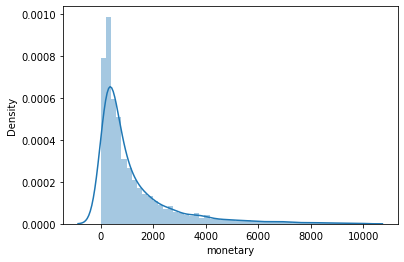

In [122]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = rfm.query('monetary < 10000')['monetary']

ax = sns.distplot(x)


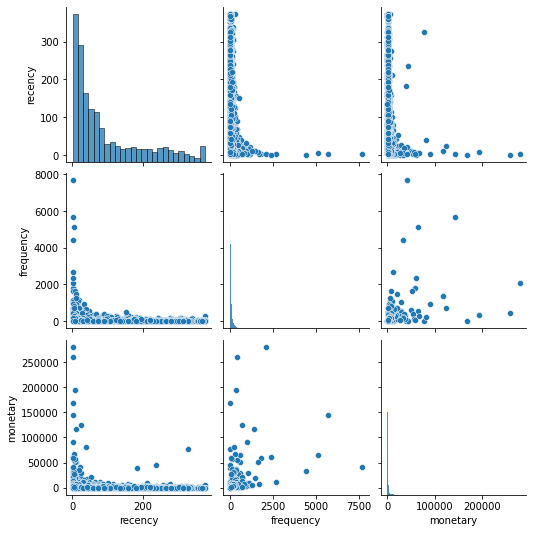

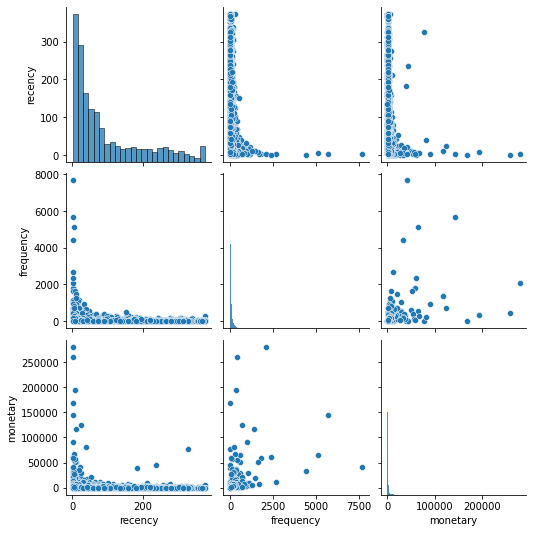

In [39]:
sns.pairplot(rfm)

Now we split the metrics into segments using quantiles.We assign a score from 1 to 4 to Recency, Frequency and Monetary. One is the best/highest value, and four is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [123]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()



In [124]:
segmented_rfm = rfm.copy()

In [127]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [128]:
segmented_rfm['R_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['monetary'].apply(FMScore, args=('monetary',quantiles))
segmented_rfm.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346,326,1,77183.60,4,4,1
12347,3,182,4310.00,1,1,1
12348,76,31,1797.24,3,3,1
12349,19,73,1757.55,2,2,1
12350,311,17,334.40,4,4,3


In [129]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head()


,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,4,4,1,441,9
12347,3,182,4310.00,1,1,1,111,3
12348,76,31,1797.24,3,3,1,331,7
12349,19,73,1757.55,2,2,1,221,5
12350,311,17,334.40,4,4,3,443,11


In [130]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,4,4,1,441,9
12347,3,182,4310.00,1,1,1,111,3
12348,76,31,1797.24,3,3,1,331,7
12349,19,73,1757.55,2,2,1,221,5
12350,311,17,334.40,4,4,3,443,11


In [163]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(segmented_rfm.RFM_Score, q = 4, labels = Loyalty_Level)
segmented_rfm['RFM_Loyalty_Level'] = Score_cuts.values
segmented_rfm.reset_index().head()


,CustomerID,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Loyalty_Level
0,12346,326,1,77183.60,4,4,1,441,9,Silver
1,12347,3,182,4310.00,1,1,1,111,3,Platinum
2,12348,76,31,1797.24,3,3,1,331,7,Gold
3,12349,19,73,1757.55,2,2,1,221,5,Platinum
4,12350,311,17,334.40,4,4,3,443,11,Bronze


In [164]:
#Validate the data for RFM_Segment = 111
segmented_rfm[segmented_rfm['RFM_Segment']=='111'].sort_values('monetary', ascending=False).reset_index().head(10)

,CustomerID,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Loyalty_Level
0,14646,2,2076,280206.02,1,1,1,111,3,Platinum
1,18102,1,431,259657.30,1,1,1,111,3,Platinum
2,17450,9,336,194390.79,1,1,1,111,3,Platinum
3,14911,2,5670,143711.17,1,1,1,111,3,Platinum
4,14156,10,1395,117210.08,1,1,1,111,3,Platinum
5,17511,3,963,91062.38,1,1,1,111,3,Platinum
6,16684,5,277,66653.56,1,1,1,111,3,Platinum
7,14096,5,5111,65164.79,1,1,1,111,3,Platinum
8,13694,4,568,65039.62,1,1,1,111,3,Platinum
9,15311,1,2366,60632.75,1,1,1,111,3,Platinum


In [139]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [140]:
#Recency Vs Frequency
graph = segmented_rfm.query("monetary < 50000 and frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
                        color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "frequency"},
        xaxis= {'title': "recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [141]:
#Frequency Vs Monetary
graph = segmented_rfm.query("monetary < 50000 and frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
                       )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
    yaxis= {'title': "monetary"},
        xaxis= {'title': "frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [142]:
#Recency Vs Monetary
graph = segmented_rfm.query("monetary < 50000 and frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "monetary"},
        xaxis= {'title': "recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)





<font color='red' size="3px"><b><u>K-Means Clustering</u><b/></font>

In [144]:
RFMScores=segmented_rfm.copy()

In [145]:
RFMScores.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346,326,1,77183.60,4,4,1,441,9,Silver
12347,3,182,4310.00,1,1,1,111,3,Platinum
12348,76,31,1797.24,3,3,1,331,7,Gold
12349,19,73,1757.55,2,2,1,221,5,Platinum
12350,311,17,334.40,4,4,3,443,11,Bronze


In [146]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['recency'] = [handle_neg_n_zero(x) for x in RFMScores.recency]
RFMScores['monetary'] = [handle_neg_n_zero(x) for x in RFMScores.monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

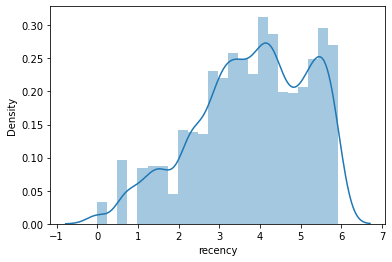

In [148]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['recency']
ax = sns.distplot(Recency_Plot)

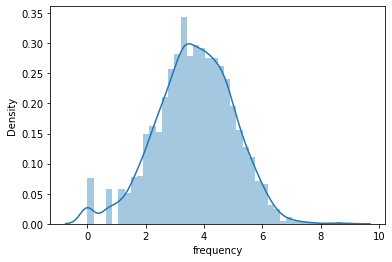

In [149]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('frequency < 1000')['frequency']
ax = sns.distplot(Frequency_Plot)

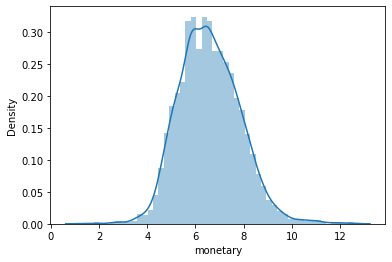

In [150]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('monetary < 10000')['monetary']
ax = sns.distplot(Monetary_Plot)


In [151]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)


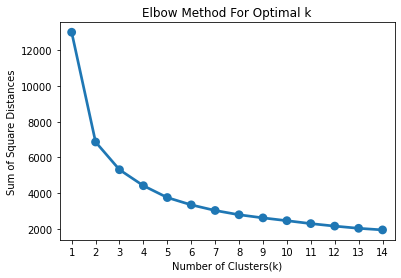

In [152]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [153]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346,326,1,77183.60,4,4,1,441,9,Silver,0
12347,3,182,4310.00,1,1,1,111,3,Platinum,2
12348,76,31,1797.24,3,3,1,331,7,Gold,0
12349,19,73,1757.55,2,2,1,221,5,Platinum,0
12350,311,17,334.40,4,4,3,443,11,Bronze,1


<Figure size 504x504 with 0 Axes>

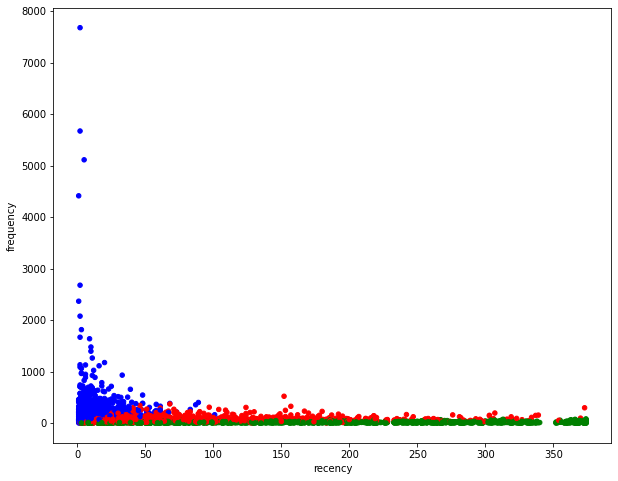

In [155]:

plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="recency", y="frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [159]:
RFMScores


,recency,frequency,monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346,326,1,77183.60,4,4,1,441,9,Silver,0,red
12347,3,182,4310.00,1,1,1,111,3,Platinum,2,blue
12348,76,31,1797.24,3,3,1,331,7,Gold,0,red
12349,19,73,1757.55,2,2,1,221,5,Platinum,0,red
12350,311,17,334.40,4,4,3,443,11,Bronze,1,green
...,...,...,...,...,...,...,...,...,...,...,...
18280,278,10,180.60,4,4,4,444,12,Bronze,1,green
18281,181,7,80.82,4,4,4,444,12,Bronze,1,green
18282,8,12,178.05,1,4,4,144,9,Silver,1,green
